<img src="images/banner.png" style="width: 100%;">

# Working With Different Data Formats

References:

[1] Visochek, Allan. *Practical Data Wrangling: Expert techniques for transforming your raw data into a valuable source for analytics.* Packt Publishing Ltd, 2017.

[2] McKinney, Wes. *Python for data analysis.* " O'Reilly Media, Inc.", 2022.

[3] pandas documentation - https://pandas.pydata.org/docs/

[4] Revised and grammar checked using ChatGPT - https://chatgpt.com/

Prepared by: Leodegario Lorenzo II

In [1]:
import pandas as pd

Data encountered in real-world analysis varies in how structured it is - ranging from **structured** to **semi-structured** and **unstructured** formats. Preparing these data formats for analysis requires appropriate tools and data wrangling techniques. In this notebook, we explore how to work with structured and semi-structured data using Python, focusing on commonly used formats such as CSV, Excel, and JSON files. We will mainly use `pandas` and Python’s standard library as we we walk through fundamental data wrangling techniques.

## 1 Comma-Separated Values (CSV)

The comma-separated values (CSV) or `csv` format is a text file format used to store tabular data consisting of values separated by commas. Each data entry is represented by a single line and by convention contains column headers as its first row.

As an example of a `csv` file, we are given the different player statistics for the NBA Season 2024 to 2025 in `nba_24_25.csv`. A quick inspection of the file yields:

In [3]:
!head data/nba_24_25.csv

'head' is not recognized as an internal or external command,
operable program or batch file.


The data is relatively clean with minimal errors in data entry. We can load this `csv` file into our notebook using the `pandas` function `read_csv` as a `DataFrame`.

In [4]:
nba_24_25 = pd.read_csv('data/nba_24_25.csv')
nba_24_25

,Player,Tm,Opp,Res,MP,FG,FGA,FG%,3P,3PA,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,GmSc,Data
0,Jayson Tatum,BOS,NYK,W,30.30,14,18,0.778,8,11,...,4,4,10,1,1,1,1,37,38.1,2024-10-22
1,Anthony Davis,LAL,MIN,W,37.58,11,23,0.478,1,3,...,13,16,4,1,3,1,1,36,34.0,2024-10-22
2,Derrick White,BOS,NYK,W,26.63,8,13,0.615,6,10,...,3,3,4,1,0,0,1,24,22.4,2024-10-22
3,Jrue Holiday,BOS,NYK,W,30.52,7,9,0.778,4,6,...,2,4,4,1,0,0,2,18,19.5,2024-10-22
4,Miles McBride,NYK,BOS,L,25.85,8,10,0.800,4,5,...,0,0,2,0,0,1,1,22,17.8,2024-10-22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16507,Emoni Bates,CLE,WAS,W,5.18,0,2,0.000,0,2,...,0,0,2,0,0,0,2,0,-0.8,2025-02-07
16508,A.J. Green,MIL,ATL,L,20.75,1,5,0.200,0,2,...,1,1,1,0,0,0,2,2,-0.9,2025-02-07
16509,Kenrich Williams,OKC,TOR,W,16.70,0,5,0.000,0,3,...,1,3,2,0,0,1,0,0,-1.4,2025-02-07
16510,Tyrese Martin,BRK,MIA,W,20.70,1,5,0.200,0,4,...,5,5,1,0,0,3,2,2,-2.7,2025-02-07


Notice that `pandas` automatically parses the first row in our `csv` as the column header. The index is also automatically created which corresponds to the row number of the data entry.

In [5]:
nba_24_25.columns

Index(['Player', 'Tm', 'Opp', 'Res', 'MP', 'FG', 'FGA', 'FG%', '3P', '3PA',
       '3P%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK',
       'TOV', 'PF', 'PTS', 'GmSc', 'Data'],
      dtype='object')

In [6]:
nba_24_25.index

RangeIndex(start=0, stop=16512, step=1)

Suppose that we want to use the player's name as index, we can set the index column by specifying the `index_col` parameter.

In [7]:
nba_24_25 = pd.read_csv('data/nba_24_25.csv', index_col='Player')
nba_24_25

,Tm,Opp,Res,MP,FG,FGA,FG%,3P,3PA,3P%,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,GmSc,Data
Player,,,,,,,,,,,,,,,,,,,,,
Jayson Tatum,BOS,NYK,W,30.30,14,18,0.778,8,11,0.727,...,4,4,10,1,1,1,1,37,38.1,2024-10-22
Anthony Davis,LAL,MIN,W,37.58,11,23,0.478,1,3,0.333,...,13,16,4,1,3,1,1,36,34.0,2024-10-22
Derrick White,BOS,NYK,W,26.63,8,13,0.615,6,10,0.600,...,3,3,4,1,0,0,1,24,22.4,2024-10-22
Jrue Holiday,BOS,NYK,W,30.52,7,9,0.778,4,6,0.667,...,2,4,4,1,0,0,2,18,19.5,2024-10-22
Miles McBride,NYK,BOS,L,25.85,8,10,0.800,4,5,0.800,...,0,0,2,0,0,1,1,22,17.8,2024-10-22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Emoni Bates,CLE,WAS,W,5.18,0,2,0.000,0,2,0.000,...,0,0,2,0,0,0,2,0,-0.8,2025-02-07
A.J. Green,MIL,ATL,L,20.75,1,5,0.200,0,2,0.000,...,1,1,1,0,0,0,2,2,-0.9,2025-02-07
Kenrich Williams,OKC,TOR,W,16.70,0,5,0.000,0,3,0.000,...,1,3,2,0,0,1,0,0,-1.4,2025-02-07


Some other parameters worth exploring and understanding for the `read_csv` function are - `delimeter`, `usecols`, `header`, `dtype`, `skiprows`, `nrows`, `na_values`, `encoding`, and `parse_dates`. See the documentation of **[pandas.read_csv](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html)** for more details.

Let's demonstrate some essential `pandas` functionalities and a quick data analysis with the `csv` file provided.

Let’s begin by taking a look at the data types `pandas` inferred for each column.

In [8]:
nba_24_25.dtypes

Tm       object
Opp      object
Res      object
MP      float64
FG        int64
FGA       int64
FG%     float64
3P        int64
3PA       int64
3P%     float64
FT        int64
FTA       int64
FT%     float64
ORB       int64
DRB       int64
TRB       int64
AST       int64
STL       int64
BLK       int64
TOV       int64
PF        int64
PTS       int64
GmSc    float64
Data     object
dtype: object

The data type inside each column has been properly inferred except for the `Data` column, which should have been a date time format. We can modify this by directly working on the data frame `nba_24_25`. But let's use the functionalities of `read_csv` to handle this siutation. We may also want to change the name of the `Data` column to be `Date` for it to be more informative.

In [9]:
nba_24_25 = (pd.read_csv('data/nba_24_25.csv', index_col='Player',
                         parse_dates=['Data'])
               .rename(columns={'Data': 'Date'}))
nba_24_25

,Tm,Opp,Res,MP,FG,FGA,FG%,3P,3PA,3P%,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,GmSc,Date
Player,,,,,,,,,,,,,,,,,,,,,
Jayson Tatum,BOS,NYK,W,30.30,14,18,0.778,8,11,0.727,...,4,4,10,1,1,1,1,37,38.1,2024-10-22
Anthony Davis,LAL,MIN,W,37.58,11,23,0.478,1,3,0.333,...,13,16,4,1,3,1,1,36,34.0,2024-10-22
Derrick White,BOS,NYK,W,26.63,8,13,0.615,6,10,0.600,...,3,3,4,1,0,0,1,24,22.4,2024-10-22
Jrue Holiday,BOS,NYK,W,30.52,7,9,0.778,4,6,0.667,...,2,4,4,1,0,0,2,18,19.5,2024-10-22
Miles McBride,NYK,BOS,L,25.85,8,10,0.800,4,5,0.800,...,0,0,2,0,0,1,1,22,17.8,2024-10-22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Emoni Bates,CLE,WAS,W,5.18,0,2,0.000,0,2,0.000,...,0,0,2,0,0,0,2,0,-0.8,2025-02-07
A.J. Green,MIL,ATL,L,20.75,1,5,0.200,0,2,0.000,...,1,1,1,0,0,0,2,2,-0.9,2025-02-07
Kenrich Williams,OKC,TOR,W,16.70,0,5,0.000,0,3,0.000,...,1,3,2,0,0,1,0,0,-1.4,2025-02-07


The `Data` column has now been properly parsed as a `datetime` format and renamed to `Date`.

In [10]:
nba_24_25.dtypes

Tm              object
Opp             object
Res             object
MP             float64
FG               int64
FGA              int64
FG%            float64
3P               int64
3PA              int64
3P%            float64
FT               int64
FTA              int64
FT%            float64
ORB              int64
DRB              int64
TRB              int64
AST              int64
STL              int64
BLK              int64
TOV              int64
PF               int64
PTS              int64
GmSc           float64
Date    datetime64[ns]
dtype: object

To select certain rows or subsets of the data, we can use the `loc` and `iloc` method of the `DataFrame`.

For example, to select the data rows of `Stephen Curry`:

In [11]:
nba_24_25.loc['Stephen Curry', :]

,Tm,Opp,Res,MP,FG,FGA,FG%,3P,3PA,3P%,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,GmSc,Date
Player,,,,,,,,,,,,,,,,,,,,,
Stephen Curry,GSW,POR,W,25.07,4,10,0.400,3,7,0.429,...,9,9,10,2,0,2,0,17,21.3,2024-10-23
Stephen Curry,GSW,UTA,W,27.42,7,20,0.350,4,13,0.308,...,3,3,4,2,0,3,3,20,10.3,2024-10-25
Stephen Curry,GSW,LAC,L,26.70,6,11,0.545,4,7,0.571,...,4,4,6,2,1,6,1,18,14.4,2024-10-27
Stephen Curry,GSW,WAS,W,24.08,7,15,0.467,4,9,0.444,...,2,3,6,0,0,2,1,24,19.4,2024-11-04
Stephen Curry,GSW,BOS,W,34.38,8,17,0.471,4,9,0.444,...,7,7,9,4,1,3,2,27,27.6,2024-11-06
Stephen Curry,GSW,CLE,L,23.77,5,10,0.500,1,4,0.250,...,1,1,2,2,0,6,0,12,4.7,2024-11-08
Stephen Curry,GSW,OKC,W,36.50,13,23,0.565,7,13,0.538,...,4,5,7,1,1,3,2,36,29.4,2024-11-10
Stephen Curry,GSW,DAL,W,34.87,14,27,0.519,5,12,0.417,...,6,6,9,1,2,4,2,37,29.0,2024-11-12
Stephen Curry,GSW,MEM,W,26.02,4,9,0.444,3,7,0.429,...,7,8,5,4,0,3,2,13,14.8,2024-11-15


If we only want specific columns, say the `3P` and `3PA`, we specify those columns as:

In [17]:
nba_24_25.loc['Stephen Curry', ['3P', '3PA']]

,3P,3PA
Player,,
Stephen Curry,3,7
Stephen Curry,4,13
Stephen Curry,4,7
Stephen Curry,4,9
Stephen Curry,4,9
Stephen Curry,1,4
Stephen Curry,7,13
Stephen Curry,5,12
Stephen Curry,3,7


You can also use a boolean array as your indexer. For example, we can select all instances where a player has scored more than 30 points in a game using the following expression:

In [18]:
nba_24_25.loc[nba_24_25.PTS >= 30]

,Tm,Opp,Res,MP,FG,FGA,FG%,3P,3PA,3P%,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,GmSc,Date
Player,,,,,,,,,,,,,,,,,,,,,
Jayson Tatum,BOS,NYK,W,30.30,14,18,0.778,8,11,0.727,...,4,4,10,1,1,1,1,37,38.1,2024-10-22
Anthony Davis,LAL,MIN,W,37.58,11,23,0.478,1,3,0.333,...,13,16,4,1,3,1,1,36,34.0,2024-10-22
LaMelo Ball,CHO,HOU,W,37.92,10,20,0.500,4,12,0.333,...,7,8,11,1,1,2,3,34,33.0,2024-10-23
Lauri Markkanen,UTA,MEM,L,34.57,9,15,0.600,4,7,0.571,...,8,9,2,0,0,2,2,35,29.4,2024-10-23
Trae Young,ATL,BRK,W,36.67,7,16,0.438,2,6,0.333,...,4,5,12,1,1,3,1,30,29.4,2024-10-23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Devin Booker,PHO,UTA,W,48.87,18,33,0.545,3,10,0.300,...,5,6,11,1,0,4,4,47,36.0,2025-02-07
Jordan Poole,WAS,CLE,L,37.25,16,32,0.500,4,17,0.235,...,2,4,5,1,0,3,3,45,30.5,2025-02-07
Malik Beasley,DET,PHI,W,37.98,13,23,0.565,9,19,0.474,...,1,3,1,0,0,1,1,36,25.3,2025-02-07


To sort the result, we can use the `sort_values` method specifying the proper parameters.

In [19]:
nba_24_25.loc[nba_24_25.PTS >= 30].sort_values(by='PTS', ascending=False)

,Tm,Opp,Res,MP,FG,FGA,FG%,3P,3PA,3P%,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,GmSc,Date
Player,,,,,,,,,,,,,,,,,,,,,
De'Aaron Fox,SAC,MIN,L,44.48,22,35,0.629,6,10,0.600,...,1,3,7,3,1,6,3,60,47.0,2024-11-15
Giannis Antetokounmpo,MIL,DET,W,43.63,21,34,0.618,1,2,0.500,...,11,14,7,2,3,3,1,59,54.2,2024-11-13
Nikola Jokić,DEN,WAS,L,38.65,22,38,0.579,3,5,0.600,...,9,16,8,1,0,5,5,56,43.8,2024-12-07
Jalen Brunson,NYK,WAS,W,44.00,18,31,0.581,3,11,0.273,...,3,3,9,0,0,3,1,55,43.9,2024-12-28
Shai Gilgeous-Alexander,OKC,UTA,W,37.47,17,35,0.486,3,10,0.300,...,5,8,5,3,2,3,3,54,43.2,2025-01-22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Luka Dončić,DAL,TOR,W,38.23,9,20,0.450,6,13,0.462,...,13,13,11,4,0,4,4,30,29.6,2024-12-07
Franz Wagner,ORL,PHI,L,38.27,10,23,0.435,3,12,0.250,...,5,5,5,1,1,4,2,30,19.8,2024-12-06
Jalen Williams,OKC,POR,W,35.88,11,19,0.579,5,9,0.556,...,7,7,8,2,2,3,3,30,28.0,2024-11-20


You can also chain different conditional statement using the *bitwise* operators.

In [20]:
nba_24_25.loc[(nba_24_25.PTS >= 30) & (nba_24_25.Tm == 'GSW')].sort_values(by='PTS', ascending=False)

,Tm,Opp,Res,MP,FG,FGA,FG%,3P,3PA,3P%,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,GmSc,Date
Player,,,,,,,,,,,,,,,,,,,,,
Stephen Curry,GSW,LAL,L,35.62,14,24,0.583,8,15,0.533,...,1,1,6,0,0,4,3,38,26.1,2024-12-25
Stephen Curry,GSW,DAL,W,34.87,14,27,0.519,5,12,0.417,...,6,6,9,1,2,4,2,37,29.0,2024-11-12
Stephen Curry,GSW,LAL,L,37.08,13,35,0.371,6,20,0.300,...,5,7,4,1,1,4,3,37,19.9,2025-02-06
Stephen Curry,GSW,OKC,W,36.50,13,23,0.565,7,13,0.538,...,4,5,7,1,1,3,2,36,29.4,2024-11-10
Jonathan Kuminga,GSW,LAC,L,36.77,11,19,0.579,1,3,0.333,...,6,10,5,2,1,3,1,34,31.3,2024-12-27
Jonathan Kuminga,GSW,PHO,W,34.45,12,20,0.600,2,5,0.400,...,4,9,3,1,0,1,4,34,28.4,2024-12-28
Jonathan Kuminga,GSW,HOU,W,32.92,13,22,0.591,3,6,0.500,...,6,7,2,0,1,3,3,33,22.4,2024-12-05
Stephen Curry,GSW,UTA,L,34.73,12,31,0.387,6,18,0.333,...,1,1,7,0,1,3,2,32,17.2,2025-02-05
Stephen Curry,GSW,MIN,W,34.22,10,21,0.476,7,16,0.438,...,3,3,10,1,0,1,1,31,27.4,2024-12-21


To create new columns, we can use `loc` then specify the desired new column as its label while performing an assigning operation for its value:

In [24]:
nba_24_25.loc[:, 'Eff'] = nba_24_25.PTS / nba_24_25.MP

In [25]:
nba_24_25.sort_values(by='Eff', ascending=False)

,Tm,Opp,Res,MP,FG,FGA,FG%,3P,3PA,3P%,...,TRB,AST,STL,BLK,TOV,PF,PTS,GmSc,Date,Eff
Player,,,,,,,,,,,,,,,,,,,,,
Chris Livingston,MIL,IND,W,0.50,1,1,1.0,0,0,0.0,...,2,0,0,0,0,0,2,2.7,2024-11-22,4.000000
JT Thor,CLE,MIA,L,1.65,2,2,1.0,1,1,1.0,...,0,0,0,0,0,0,5,4.4,2024-12-08,3.030303
Brandon Williams,DAL,LAL,W,1.43,2,2,1.0,0,0,0.0,...,0,0,0,0,0,0,4,3.4,2025-01-07,2.797203
Maxwell Lewis,BRK,TOR,L,1.08,1,1,1.0,1,1,1.0,...,0,0,0,0,0,0,3,2.7,2025-01-01,2.777778
Patrick Baldwin Jr.,WAS,NOP,L,1.12,1,1,1.0,1,1,1.0,...,0,0,0,0,0,0,3,2.7,2025-01-03,2.678571
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Eric Gordon,PHI,DET,L,10.35,0,4,0.0,0,3,0.0,...,3,2,0,0,3,1,0,-3.9,2025-02-07,0.000000
Karlo Matković,NOP,BRK,L,0.00,0,0,0.0,0,0,0.0,...,0,0,0,0,0,0,0,0.0,2024-11-11,NaN
Alex Len,SAC,BRK,L,0.00,0,0,0.0,0,0,0.0,...,0,0,0,0,0,0,0,0.0,2024-11-24,NaN


For a quick look of a several statistical measures for numerical data, we can use the `describe` function of `pandas.

In [26]:
nba_24_25.PTS.describe()

count    16512.000000
mean        10.520894
std          8.829493
min          0.000000
25%          3.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: PTS, dtype: float64

Finally, we show how to perform a quick visualization of our data using `pandas`.

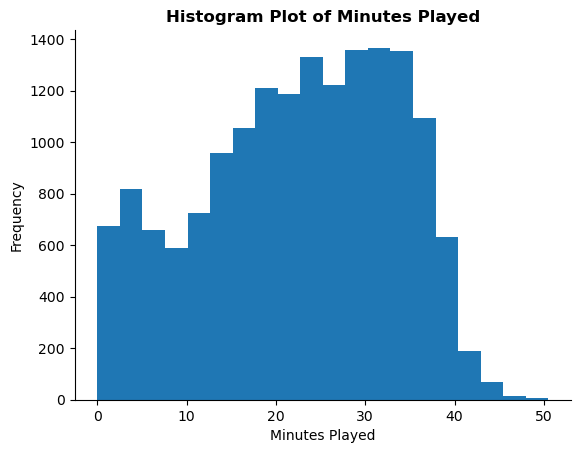

In [27]:
ax = nba_24_25.MP.plot(kind='hist', bins=20)

ax.set_xlabel('Minutes Played')
ax.spines[['top', 'right']].set_visible(False)
ax.set_title("Histogram Plot of Minutes Played", weight='bold');

In [28]:
nba_24_25.loc[nba_24_25.Date == '2024-12-25']

,Tm,Opp,Res,MP,FG,FGA,FG%,3P,3PA,3P%,...,TRB,AST,STL,BLK,TOV,PF,PTS,GmSc,Date,Eff
Player,,,,,,,,,,,,,,,,,,,,,
Mikal Bridges,NYK,SAS,W,43.25,17,25,0.680,6,9,0.667,...,1,4,2,2,0,2,41,36.4,2024-12-25,0.947977
Victor Wembanyama,SAS,NYK,L,40.38,16,31,0.516,6,16,0.375,...,18,4,1,4,4,1,42,35.1,2024-12-25,1.040119
Tyrese Maxey,PHI,BOS,W,40.80,12,23,0.522,3,9,0.333,...,4,12,3,1,3,2,33,31.6,2024-12-25,0.808824
LeBron James,LAL,GSW,W,36.97,12,22,0.545,2,4,0.500,...,4,10,2,1,1,3,31,29.1,2024-12-25,0.838518
Jayson Tatum,BOS,PHI,L,41.85,11,20,0.550,4,8,0.500,...,15,4,1,1,3,2,32,28.0,2024-12-25,0.764636
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Sam Hauser,BOS,PHI,L,13.45,0,1,0.000,0,1,0.000,...,2,0,0,0,0,1,0,-0.1,2024-12-25,0.000000
Spencer Dinwiddie,DAL,MIN,L,14.13,0,7,0.000,0,4,0.000,...,1,2,1,0,0,0,2,-0.2,2024-12-25,0.141543
Oso Ighodaro,PHO,DEN,W,5.53,0,1,0.000,0,0,0.000,...,1,0,0,0,0,0,0,-0.4,2024-12-25,0.000000


## 2 Excel Binary Format (XLS)

The main difference between Excel (`.xls` or `xlsx`) files and `csv` files is taht Excel files use a binary format, meaning they cannot be read directly as plain text. In terms of data structure, however, both formats typically store tabular data composed of rows and columns.

Unlike `csv` files, however, an Excel file can contain multiple worksheets within a single file. As such, pandas' `read_excel` function offers similar functionalities to `read_csv`, but also provides an additional option to specify which worksheet to load into a `DataFrame`.

To demonstrate some functionalities of pandas' `read_excel`, we will look at an Excel file containing the population data of NCR for May 2020.

In [29]:
ncr = pd.read_excel('data/ncr.xlsx')
ncr

,Unnamed: 0,"Total Population by Province, City, and Municipality:",Unnamed: 2
0,NaN,"as of May 1, 2020",NaN
1,NaN,NaN,NaN
2,NaN,"Province, City, and Municipality",Total
3,NaN,and Barangay,Population
4,NaN,NaN,NaN
5,NaN,NATIONAL CAPITAL REGION,13484462
6,NaN,NaN,NaN
7,NaN,CITY OF MANILA,1846513
8,NaN,CITY OF MANDALUYONG,425758
9,NaN,CITY OF MARIKINA,456059


Notice that by default, `read_excel` loads the first sheet in the file. If we want to specifically open a certain sheet, we can specify it through the `sheet_name` parameter.

For now, let's work with the first sheet found by `read_excel`. This contains the population count for each city in NCR. However, there's some effort of data cleaning to be made.

In essence, what we want are the province, city, and municipality names and their corresponding population, thus we will drop some columns. We can accomplish this in several ways, we will show one such approach:

In [50]:
ncr = (pd.read_excel('data/ncr.xlsx', skiprows=4, usecols=[1, 2],
                     names=['Province, City, and Municipality', 'Population'])
         .dropna().reset_index(drop=True))
ncr

,"Province, City, and Municipality",Population
0,NATIONAL CAPITAL REGION,13484462.0
1,CITY OF MANILA,1846513.0
2,CITY OF MANDALUYONG,425758.0
3,CITY OF MARIKINA,456059.0
4,CITY OF PASIG,803159.0
5,QUEZON CITY,2960048.0
6,CITY OF SAN JUAN,126347.0
7,CITY OF CALOOCAN,1661584.0
8,CITY OF MALABON,380522.0
9,CITY OF NAVOTAS,247543.0


We can export this data frame into an Excel file using the `DataFrame` method `to_excel`.

In [31]:
ncr.to_excel('data/ncr_cleaned.xlsx', index=False)

If we want to write an Excel file with several sheets, we can use pandas' `ExcelWriter` using the `with` statement as a context manager.

Let's say for example, we want to separate the data into separate sheets for each administrative level (province, city, municipality). We can accomplish this using the following code:

In [32]:
ncr.columns = ['Name', 'Population']
with pd.ExcelWriter('data/ncr_sheets.xlsx') as writer:
    ncr.loc[ncr.iloc[:, 0].str.contains('REGION')].to_excel(writer, sheet_name='region', index=False)
    ncr.loc[ncr.iloc[:, 0].str.contains('CITY')].to_excel(writer, sheet_name='city', index=False)
    ncr.loc[ncr.iloc[:, 0].str.contains('PATEROS')].to_excel(writer, sheet_name='municipality', index=False)

## 3 JavaScript Object Notation (JSON)

The `JSON` format is an example of a **semi-structured**, **hierarchical** data format. Compared to tabular data, `JSON` is more flexible nad free-form, though it often consists of a collection of records that follow a consistent internal structure. One of the main challenges in working with `JSON` files is understanding this structure and identifying which fields are relevant for extraction. While inspecting the `JSON` file directly can help in smaller examples, this approach becomes quickly impractical as file size and complexity increases.

In this section, we demonstrate two approaches for working with JSON files. THe first uses Python's built-in `json` library, while the other approach loads the JSON file directly into `pandas`. The `json` library is especially useful when the structure of the data is unclear or deeply nested, whereas `pandas` is often suitable for JSON files that already resemble tabular data.

### `json` library

In [33]:
import json

One thing that we can notice is that JSON text files resembles Python dictionaries.

In [34]:
json_str = """{ 
  "firstName": "John", 
  "lastName": "Smith", 
  "isAlive": true, 
  "age": 27, 
  "address": { 
    "streetAddress": "21 2nd Street", 
    "city": "New York", 
    "state": "NY", 
    "postalCode": "10021-3100" 
  }, 
  "phoneNumbers": [ 
    { 
      "type": "home", 
      "number": "212 555-1234" 
    }, 
    {
      "type": "office", 
      "number": "646 555-4567" 
    } 
  ], 
  "children": [], 
  "spouse": null 
}
"""

As such, the way we explore `json` files is similar to how we explore nested `dict` in Python. We can do so by first reading a json formatted string using `json.loads`

In [35]:
json_as_dict = json.loads(json_str)
json_as_dict

{'firstName': 'John',
 'lastName': 'Smith',
 'isAlive': True,
 'age': 27,
 'address': {'streetAddress': '21 2nd Street',
  'city': 'New York',
  'state': 'NY',
  'postalCode': '10021-3100'},
 'phoneNumbers': [{'type': 'home', 'number': '212 555-1234'},
  {'type': 'office', 'number': '646 555-4567'}],
 'children': [],
 'spouse': None}

In [36]:
type(json_as_dict)

dict

Now, usually `json` files don't come directly as string objects in Python, but are rather read as `.json` text files.

To demonstrate how we read `json` files, we will use a dataset from **Seeclickfix**, a platform to report non-emergency issues to local governments. This dataset contains a series of data entries that represents issue reports using the platform. The sample dataset is saved as `scf_data.json` in the `data` folder.

In [37]:
with open('data/scf_data.json') as f:
    data = json.load(f)

Let's first understand the structure of the data by looking at the keys of this dictionary.

In [38]:
data.keys()

dict_keys(['errors', 'issues', 'metadata'])

It has three keys - `errors`, `issues`, and `metadata`. Among these, the core data lies in the `issues` key, which makes sense since the dataset contains issue reports. Let's look at what it contains.

In [39]:
data['issues']

[{'transitions': {'close_url': 'https://seeclickfix.com/api/v2/issues/3662906/close'},
  'status': 'Open',
  'point': {'type': 'Point',
   'coordinates': [-74.04202270507812, 40.72603225708008]},
  'updated_at': '2017-08-26T18:06:54-04:00',
  'closed_at': None,
  'shortened_url': None,
  'flag_url': 'https://seeclickfix.com/api/v2/issues/3662906/flag',
  'url': 'https://seeclickfix.com/api/v2/issues/3662906',
  'reopened_at': None,
  'lng': -74.0420227050781,
  'html_url': 'https://seeclickfix.com/issues/3662906',
  'id': 3662906,
  'address': '467 Manila Ave Jersey City, NJ 07302, USA',
  'description': 'This one is DEEP, around six inches, definitely a major hazard needs repair immediately before people get seriously hurt.',
  'summary': 'Streets: Pothole/sinkhole/uneven pavement',
  'acknowledged_at': None,
  'rating': 1,
  'media': {'image_square_100x100': 'https://seeclickfix.com/files/issue_images/0085/7979/1503785141574_square.jpg',
   'representative_image_url': 'https://seecli

The issues is a list of data entries represented by Python dictionary. Which we can convert to a `DataFrame` for easier manipulation.

In [40]:
df_issues = pd.DataFrame(data['issues'])

We can inspect a single element for a closer inspection of the data structure:

In [41]:
df_issues.iloc[0]

transitions        {'close_url': 'https://seeclickfix.com/api/v2/...
status                                                          Open
point              {'type': 'Point', 'coordinates': [-74.04202270...
updated_at                                 2017-08-26T18:06:54-04:00
closed_at                                                       None
shortened_url                                                   None
flag_url           https://seeclickfix.com/api/v2/issues/3662906/...
url                    https://seeclickfix.com/api/v2/issues/3662906
reopened_at                                                     None
lng                                                       -74.042023
html_url                      https://seeclickfix.com/issues/3662906
id                                                           3662906
address                    467 Manila Ave Jersey City, NJ 07302, USA
description        This one is DEEP, around six inches, definitel...
summary                    Streets

Depending on the certain analysis that we want to do, we may want to select a subset of the data for further analysis. For this case, say we are concerned with how the `description` of the issue is related with the corresponding `rating` of the user and their location. We thus select columns `created_at`, `address`, `description`, `lat`, `lng`, `rating`.

In [42]:
select_cols = ['created_at', 'address', 'description', 'lat', 'lng', 'rating']

df_scf = df_issues.loc[:, select_cols]
df_scf

,created_at,address,description,lat,lng,rating
0,2017-08-26T18:06:52-04:00,"467 Manila Ave Jersey City, NJ 07302, USA","This one is DEEP, around six inches, definitel...",40.726032,-74.042023,1
1,2017-08-26T18:06:47-04:00,"332-398 20th St Ne Washington, DC 20002, USA",Truck hasn't moved in months and seems abandon...,38.894386,-76.976242,1
2,2017-08-26T18:05:45-04:00,"3102 Summit Ave Greensboro, North Carolina",Dear Greensboro City \r\nAs a resident in 3100...,36.114508,-79.764515,1
3,2017-08-26T18:05:41-04:00,"115 Zeigler Ln Selinsgrove, PA 17870, USA",Need the screen put back in the window,40.796233,-76.877131,1
4,2017-08-26T18:04:55-04:00,"921 E Clovefield St Gilbert, Arizona",Think we have a water leak. Had a Red Push tr...,33.257179,-111.770103,1
...,...,...,...,...,...,...
95,2017-08-26T16:22:21-04:00,"4751 Violet Rd Toledo, OH 43623, USA",,41.693975,-83.630748,1
96,2017-08-26T16:22:12-04:00,"Belt Route Salt Lake City, Utah",Trash is collecting on the side of the road,40.656952,-111.952274,2
97,2017-08-26T16:21:25-04:00,"Delowe De East Point, Georgia",Council member mentioned in news still has ele...,33.687302,-84.457537,1
98,2017-08-26T16:20:40-04:00,"Belt Route Murray, Utah",Trash is collecting along the belt route,40.637625,-111.919147,1


Once again, let's check for the data types of the columns of our data frame. This time, we demonstrate the use of the `.info` method of `DataFrames`.

In [43]:
df_scf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   created_at   100 non-null    object 
 1   address      100 non-null    object 
 2   description  100 non-null    object 
 3   lat          100 non-null    float64
 4   lng          100 non-null    float64
 5   rating       100 non-null    int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 4.8+ KB


Let's convert the `created_at` column into a datetime format.

In [44]:
df_scf.created_at = pd.to_datetime(df_scf.created_at)

In [45]:
df_scf.dtypes

created_at     datetime64[ns, UTC-04:00]
address                           object
description                       object
lat                              float64
lng                              float64
rating                             int64
dtype: object

Now, let's visualize some simple statistics on our data such as:

1. A frequency count of ratings.
2. A frequency count of issues having `trash` in their description.
3. A frequency count showing the time in which the issue was created at the platform.

In [46]:
df_scf.rating.value_counts()

rating
1    74
2    19
3     7
Name: count, dtype: int64

In [47]:
df_scf.description.str.lower().str.contains('trash').value_counts()

description
False    93
True      7
Name: count, dtype: int64

In [48]:
df_scf.created_at.dt.hour.value_counts()

created_at
17    47
16    43
18    10
Name: count, dtype: int64

### pandas `read_json`

If the `json` text file already resembles a tabular structure, we can try to directly load it using pandas' function `read_json`.

As an example, let's look at a sample twitter data uploaded as the json file `sample_twitter.json.bz2`. We inspect it first using Python's standard libraries. Here, we will need the `bz2` library to decompress the json file.

In [ ]:
import bz2

In [ ]:
with bz2.open('data/sample_twitter.json.bz2', 'r') as f:
    contents = f.readlines()

In [ ]:
print(contents[:10_000])

Notice here that the data entry for this file is done per line, wherein each line follows the `json` format. In this case, if we want to use the `json` library to load the data, we will perform a list comprehension.

In [ ]:
list_of_json = [json.loads(line) for line in contents]

Which we can then again convert directly to a DataFrame.

In [ ]:
pd.DataFrame(list_of_json)

Since the raw data already resemebles some data structure, we can use `read_json` directly. However, we specify `lines` as `True`, since as we discovered, the data consists of lines of `json` text.

In [ ]:
df_twitter = pd.read_json('data/sample_twitter.json.bz2', lines=True, nrows=10)

### Writing `json` files using `pandas`

Given any data frame, we can export it into a `json` format in several ways:

- ‘split’ : dict like {{‘index’ -> [index], ‘columns’ -> [columns], ‘data’ -> [values]}}

- ‘records’ : list like [{{column -> value}}, … , {{column -> value}}]

- ‘index’ : dict like {{index -> {{column -> value}}}}

- ‘columns’ : dict like {{column -> {{index -> value}}}}

- ‘values’ : just the values array

- ‘table’ : dict like {{‘schema’: {{schema}}, ‘data’: {{data}}}}

In [ ]:
df_twitter

In [ ]:
print(df_twitter.to_json(orient='split', indent=2))

In [ ]:
print(df_twitter.to_json(orient='records', indent=2))

In [ ]:
print(df_twitter.to_json(orient='index', indent=2))

In [ ]:
print(df_twitter.to_json(orient='columns', indent=2))

In [ ]:
print(df_twitter.to_json(orient='values', indent=2))

In [ ]:
print(df_twitter.to_json(orient='table', indent=2))

`to_json` outputs a string, as such to save it onto a text file, we need to write it to a file using Python.

In [ ]:
with open('data/sample_tweets.json', 'w') as f:
    f.write(df_twitter.to_json(orient='records', indent=2))

That's it folks! We have shown how to load and wrangle data from CSV, Excel, and JSON files using Python and `pandas`, and how these steps enable basic data analysis. Mastering these workflows provides a strong foundation for working with real-world datasets and sets the stage for more advanced analytical techniques.

<img src="images/banner-down.png" style="width: 100%;">